In [46]:
import pandas as pd 
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import matplotlib
import matplotlib.patches as mpatches

import random
def random_colors(n): #n is the number of colors you need to generate
    color_set = np.zeros((n,3))
    for i in range(n):
        r = random.uniform(0, 1)
        b = random.uniform(0, 1)
        g = random.uniform(0, 1)
        color_set[i] = [r,b,g]
    return color_set


def zscore_df(df):
    new_df = pd.DataFrame()
    for column in df.columns:
        new_df[column] = zscore(df[column])
    new_df.index = df.index
    return new_df

def find_bin(X,bins): 
    width = np.abs(bins[1]-bins[2])
    num = np.floor(X/width)
    return num



META_FILE = 'metadata_dli.csv'
DATA_FILE = 'log_norm_data.csv'
cluster_order = [46, 42, 40, 31, 45, 26, 49, 39, 17, 48, 18, 44, 28,  1, 27, 29,
            19,  0, 24, 4, 21, 38, 25, 15,  3, 2, 13, 20, 52,  6,
            41, 36, 55,  9, 23,  5,  8, 10, 22, 14, 12, 11, 30, 37, 16,  7,
            51, 56, 33, 54, 47, 50, 57]




In [35]:
umap_ = pd.read_csv(META_FILE, index_col = 0)
data_df = pd.read_csv(DATA_FILE, index_col = 0)

all_RG = ['CML_R_PRE', 'CML_NR_PRE', 'CML_R_POST', 'CML_NR_POST', 'AML_R_PRE', 'AML_NR_PRE', 'AML_R_POST', 'AML_NR_POST']

aml_r_pre_color = '#70C8CE'
aml_r_post_color = '#0B7684'

aml_nr_pre_color = '#EEC0DA'
aml_nr_post_color = '#EA4E9D'

cml_r_pre_color = '#BFAFEF'
cml_r_post_color = '#664EA0'

cml_nr_pre_color = '#E8A577'
cml_nr_post_color = '#D57528'




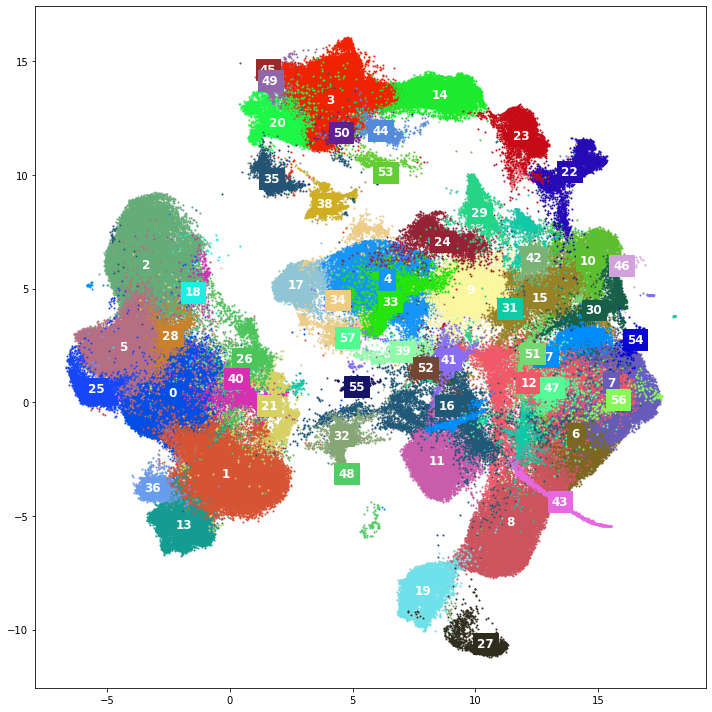

In [26]:
### 1B
umap_ = pd.read_csv(META_FILE, index_col = 0)
umap_ = umap_[umap_['BM']=='BM']

plt.figure(figsize=(10,10))
plt.scatter(umap_['x'],umap_['y'],s=2, edgecolors='none',color = "lightgrey")

n_cluster_knn = np.amax(umap_['cluster_number'])
color_set_clusters = random_colors(n_cluster_knn + 2)

#loop through labels and plot each cluster
for cluster in range(n_cluster_knn + 1):

    cells = umap_.index[umap_.cluster_number == cluster]
    plt.scatter(x=umap_.loc[cells, 'x'], 
                y=umap_.loc[cells, 'y'], s=1,
                color=color_set_clusters[cluster], 
                alpha=1)
    
    #add label
    plt.annotate(cluster, 
                 umap_.loc[cells,['x','y']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=12, weight = 'bold',
                 color='white',
                 backgroundcolor=color_set_clusters[cluster]) 
    
plt.tight_layout()
# plt.savefig('umap_updated_clusters.eps')
plt.show()

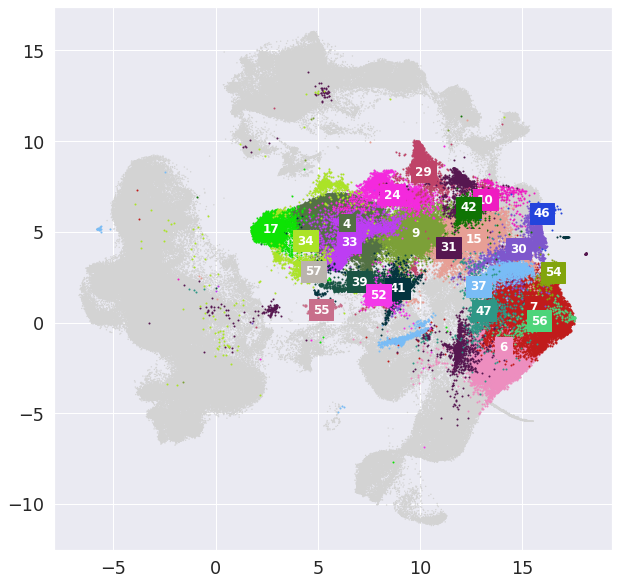

<Figure size 3240x3456 with 0 Axes>

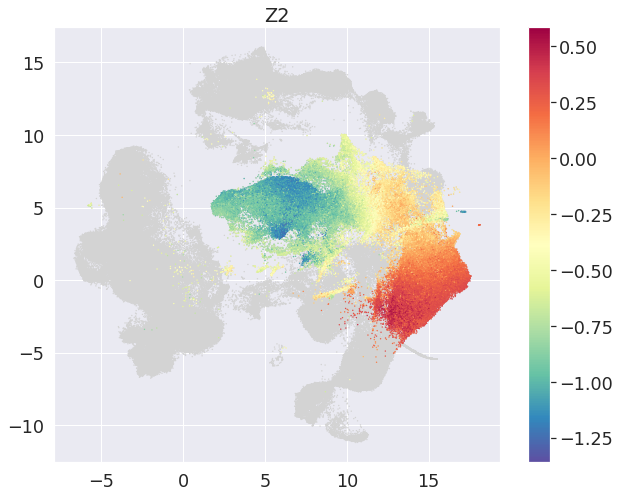

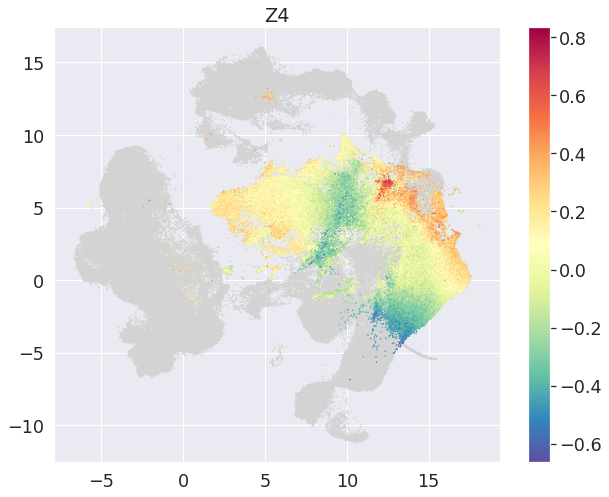

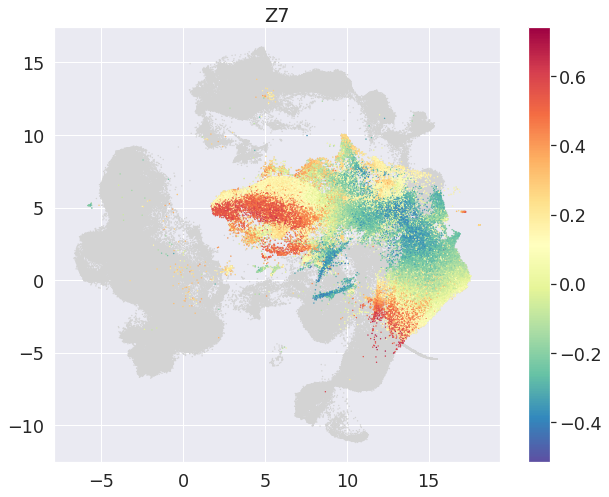

In [40]:
### 1C

umap_ = pd.read_csv(META_FILE, index_col = 0)
umap_ = umap_[umap_['BM']=='BM']

non_myeloid = [13,36,1,21,40,26,28,0,25,5,2,18,45,49,20,35,38,3,50,44,53,14,23,48,32,43,22,
               8,19,27,11,12,16,
              51]
myeloid_cells = pd.Index([])
plt.figure(figsize=(10,10))
plt.scatter(umap_['x'],umap_['y'],s=2, edgecolors='none',color = "lightgrey")

n_cluster_knn = np.amax(umap_['cluster_number'])
color_set_clusters = random_colors(n_cluster_knn + 2)
#loop through labels and plot each cluster
for cluster in range(n_cluster_knn + 1):
    if cluster in non_myeloid: continue
    
    #add data points 
    cells = umap_.index[umap_.cluster_number == cluster]
    
    if cluster == 10: 
        df = umap_[umap_['DATA']=='AML']
        cells = df.index[df['cluster_number']==10]
    myeloid_cells = myeloid_cells.union(cells)
    plt.scatter(x=umap_.loc[cells, 'x'], 
                y=umap_.loc[cells, 'y'], s=1,
                color=color_set_clusters[cluster], 
                alpha=1)
    
    #add label
    plt.annotate(cluster, 
                 umap_.loc[cells,['x','y']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=12, weight = 'bold',
                 color='white',
                 backgroundcolor=color_set_clusters[cluster]) 
    
plt.tight_layout()


## ACTUALLY RUNNING DECIPHER
# counts = pd.read_pickle('~/all_counts_combined_NEW_revised.pkl')
# import scanpy as sc
# sc.settings.verbosity = 2

# import pandas as pd

# import tqdm.notebook

# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns 
# from numpy import array
# from scipy.sparse import csr_matrix

# import random 
# ##function to generate random colors for coloring clusters
# def random_colors(n): #n is the number of colors you need to generate
#     color_set = np.zeros((n,3))
#     for i in range(n):
#         r = random.uniform(0, 1)
#         b = random.uniform(0, 1)
#         g = random.uniform(0, 1)
#         color_set[i] = [r,b,g]
#     return color_set


# from load_data import load_datasets
# from decipher_model import DecipherConfig
# from decipher_training import train_simple

# df = counts.loc[myeloid_cells]
# df = df.drop(columns = 'sample')

# # convert to sparse matrix (CSR method)
# sparse = csr_matrix(df)
# adata = sc.AnnData(sparse)
# adata.var_names = df.columns

# config = DecipherConfig(
#     latent_dim=10,
#     pre_latent_dim=2,
#     z_to_x_layers=[],
#     seed=0,
#     beta=1e-1
# )

# model, adata = train_simple(
#     adata,
#     config,
#     learning_rate=1e-2,
#     n_epochs=16,
#     plot_every_k_epoch=5,
#     plot_kwargs=dict(
#         color=["LYZ", "CD34"],
#         vmax=lambda xs: np.quantile(xs, 0.95),
#         ncols=2,
#     ),
# )
# decipher_z = pd.DataFrame(adata.obsm['decipher_z'])
# decipher_z.index = df.index
# decipher_v = pd.DataFrame(adata.obsm['decipher_v'])
# decipher_v.columns = ['x','y']
# decipher_v.index = df.index
# decipher = pd.concat([decipher_v,decipher_z], axis = 1)
# decipher.to_pickle(FILE)


### PLOTS BASED ON SAVED FILE: 
decipher = pd.read_csv('decipher_myeloid_trajectory.csv')
decipher_v = decipher[['x','y']]
decipher_z = decipher.iloc[:,2:]
n = len(decipher_z.columns); max_cols = 3
nrows = int(np.ceil(n / max_cols)); ncols = int(min((max_cols, n)))
fig = plt.figure(figsize=[15 * ncols, 12*nrows])

cmap = plt.cm.Spectral_r

save = [2,4,7]

for comp in save: 
    c=decipher_z.iloc[:,comp]
    umap_myeloid = umap_.loc[myeloid_cells]
    umap_myeloid['c'] = c
    plt.figure(figsize = (10,8))
    umap_shuffle = umap_myeloid.sample(frac = 1)
    plt.scatter(umap_['x'],umap_['y'],s=2, edgecolors='none',color = "lightgrey")
    plt.scatter(umap_shuffle['x'],umap_shuffle['y'],s=2, edgecolors='none',
        cmap=cmap, c=umap_shuffle['c'], label=i)
    plt.colorbar()
    plt.title(f'Z{comp}')
#     plt.savefig(f'Z{comp}_mainmap.eps')

<ipython-input-39-5b6289a49064>:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


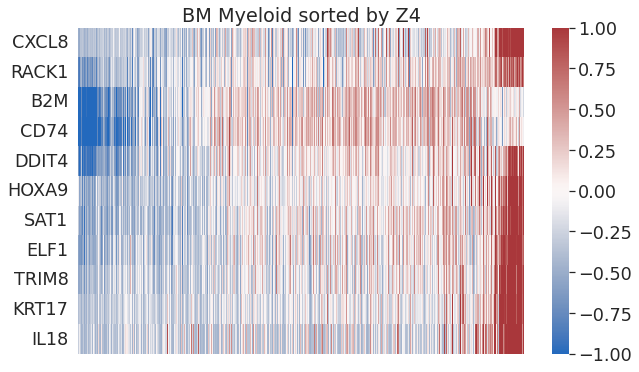

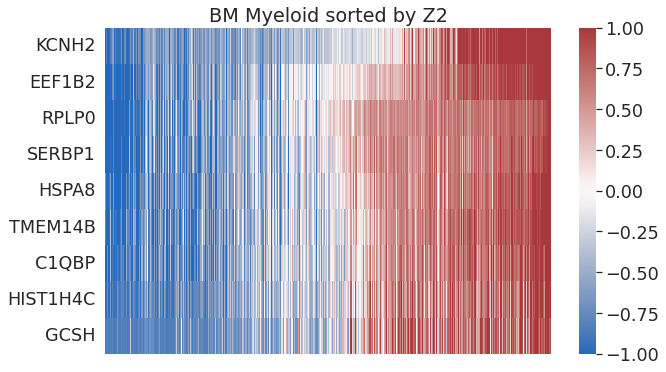

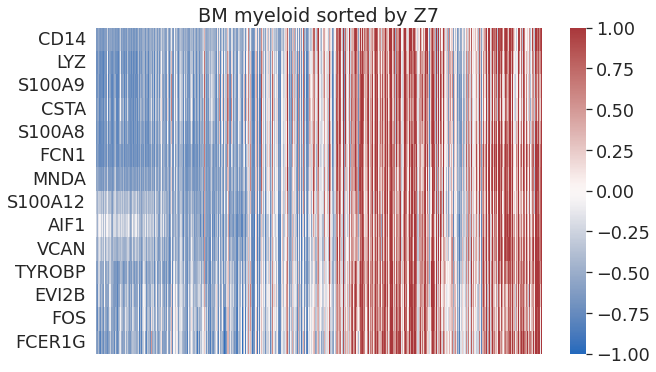

In [39]:
## AML - comp4
from scipy.stats import zscore
from scipy.ndimage.filters import gaussian_filter

genes = ['CXCL8', 'RACK1', 'B2M', 'CD74', 'DDIT4', 'HOXA9', 'SAT1', 'ELF1', 'TRIM8', 'KRT17', 'IL18']
umap_ = umap_.loc[decipher.index]
aml = umap_[umap_['DATA'] == 'AML']
df = decipher_z.loc[aml.index]
df = df.sort_values(by = 4)


data = data_df.loc[df.index, genes]

data_z = pd.DataFrame(index = data.index, columns = data.columns)
for gene in data.columns:
    data_z[gene] = zscore(data[gene])
    

smooth = pd.DataFrame(gaussian_filter(data_z.transpose(), sigma=1), index = data.columns, columns = data.index )


plt.figure(figsize = (10,6))
sns.set(font_scale = 1.6)
sns.heatmap(smooth, xticklabels = 0, yticklabels = 1, cmap = 'vlag', vmin = -1, vmax = 1)
plt.title('BM Myeloid sorted by Z4')
# plt.savefig('aml_z_smooth_fig1.eps')
plt.show()


genes = ['KCNH2', 'EEF1B2', 'RPLP0', 'SERBP1', 'HSPA8', 'TMEM14B', 'C1QBP', 'HIST1H4C', 'GCSH']
umap_ = umap_.loc[decipher.index]
cml = umap_[umap_['DATA'] == 'CML']
df = decipher_z.loc[cml.index]
df = df.sort_values(by = 2)
data = data_df.loc[df.index, genes]


data_z = pd.DataFrame(index = data.index, columns = data.columns)
for gene in data.columns:
    data_z[gene] = zscore(data[gene])

smooth = pd.DataFrame(gaussian_filter(data_z.transpose(), sigma=1), index = data.columns, columns = data.index )


plt.figure(figsize = (10,6))
sns.set(font_scale = 1.6)
sns.heatmap(smooth, xticklabels = 0, yticklabels = 1, cmap = 'vlag', vmin = -1, vmax = 1)
plt.title('BM Myeloid sorted by Z2')
# plt.savefig('cml_z_smooth_fig1.eps')
plt.show()



genes = ['CD14', 'LYZ', 'S100A9', 'CSTA', 'S100A8', 'FCN1', 'MNDA', 'S100A12', 'AIF1', 'VCAN', 
         'TYROBP', 'EVI2B', 'FOS', 'FCER1G']
bm = umap_[umap_['BM'] == 'BM']
df = decipher_z.sort_values(by = 7)

data = data_df.loc[df.index, genes]

data_z = pd.DataFrame(index = data.index, columns = data.columns)
for gene in data.columns:
    data_z[gene] = zscore(data[gene])
    
smooth = pd.DataFrame(gaussian_filter(data_z.transpose(), sigma=1), index = data.columns, columns = data.index )


plt.figure(figsize = (10,6))
sns.set(font_scale = 1.6)
sns.heatmap(smooth, xticklabels = 0, yticklabels = 1, cmap = 'vlag', vmin = -1, vmax = 1)
plt.title('BM myeloid sorted by Z7')

plt.show()


<ipython-input-47-135738ed993a>:56: RuntimeWarning: invalid value encountered in true_divide
  norm_dict[samp] = temp/snum * 100


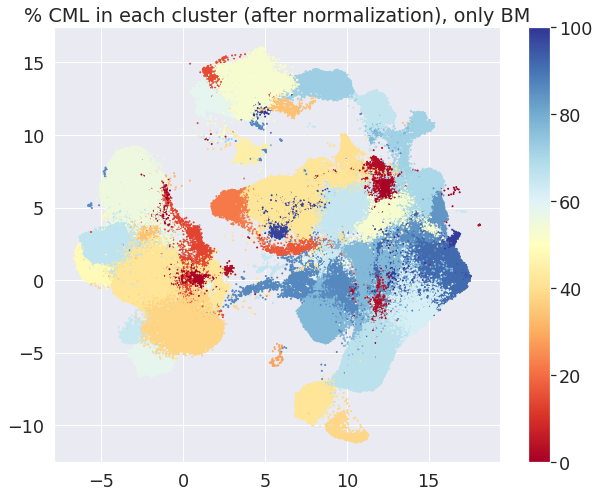

In [47]:
### 1D

umap_ = pd.read_csv(META_FILE, index_col = 0)
umap_ = umap_[umap_['BM']=='BM']
U = umap_[umap_['DATA'].isin(['AML','CML'])]


COMPARISON = 'DATA'
coloring = ['AML','CML']

n_cluster_knn = np.amax(U["cluster_number"])
a = np.arange(n_cluster_knn + 1)


#make dictionary that will hold the # of cells in each cluster from that sample
sample_dict=OrderedDict()
for i in np.unique(U[COMPARISON]):
    sample_dict[i] = np.zeros(n_cluster_knn+1)
    
    
total_samples = OrderedDict()
for samp in np.unique(U[COMPARISON]): # for each data group
    
    total_samples[samp] = 0
    
    for i,cell in enumerate(U.index): #for each cell
        
        cell_id = U.loc[cell,COMPARISON]
        
        if cell_id == samp: 
            cluster = U.loc[cell,"cluster_number"]
            array = sample_dict[samp]
            array[cluster] += 1
            sample_dict[samp] = array
            total_samples[samp] += 1

## NORMALIZE BY NUMBER OF CELLS FROM EACH DISEASE GROUP

if NORM == True:
    norm_dict = OrderedDict()
    for samp in np.unique(U[COMPARISON]):
        temp = sample_dict[samp]
        if 'AML' in samp:
            norm_dict[samp] = temp/total_cellcount['AML'] * 100
        if 'CML' in samp:
            norm_dict[samp] = temp/total_cellcount['CML'] * 100
else:
    
    norm_dict = sample_dict
    
    
snum = sum(norm_dict.values())

for samp in np.unique(U[COMPARISON]):
    temp = norm_dict[samp]
    norm_dict[samp] = temp/snum * 100
    
    
df_ratios = pd.DataFrame.from_dict(norm_dict)
df = df_ratios[df_ratios.sum(axis=1)>0]

my_order = df.loc[cluster_order]


## COLOR BY AMOUNT OF MIXING BETWEEN AML AND CML 

percent_aml = []
for cell in umap_.index: 
    cluster = umap_.loc[cell,'cluster_number']
    percent_aml.append(df.loc[cluster,'CML'])
umap_['%CML'] = percent_aml

percent_aml = []
for cell in umap_.index: 
    cluster = umap_.loc[cell,'cluster_number']
    percent_aml.append(df.loc[cluster,'AML'])
    
umap_['%AML'] = percent_aml


cmap = 'RdYlBu'

plt.figure(figsize = (10,8))
umap_shuffle = umap_.sample(frac = 1)
plt.scatter(umap_shuffle.loc[:,'x'],umap_shuffle.loc[:,'y'],s = 1, cmap = cmap, c = umap_shuffle.loc[:,'%CML'])
plt.colorbar()
plt.title('% CML in each cluster (after normalization), only BM')
# plt.savefig('umap_mixing_RdYlBu.eps')
plt.show()

<ipython-input-22-3ed5a22ac992>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  U['response_color'] = 'red'
/home/cyp2111_columbia_edu/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


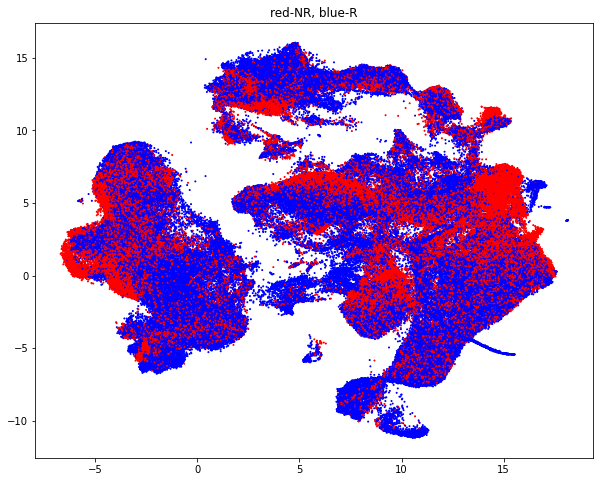

In [22]:
### 1E
U = umap_[umap_['DATA'].isin(['AML','CML'])]
U['response_color'] = 'red'
R = U[U['response']=='RESPONDER']
U.loc[R.index,'response_color'] = 'blue'


plt.figure(figsize = (10,8))
umap_shuffle = U.sample(frac = 1)
plt.scatter(umap_shuffle.loc[:,'x'],umap_shuffle.loc[:,'y'],s = 1, cmap = cmap, c = umap_shuffle.loc[:,'response_color'])

plt.title('red-NR, blue-R')
# plt.savefig('umap_mixing_RdYlBu.eps')
plt.show()


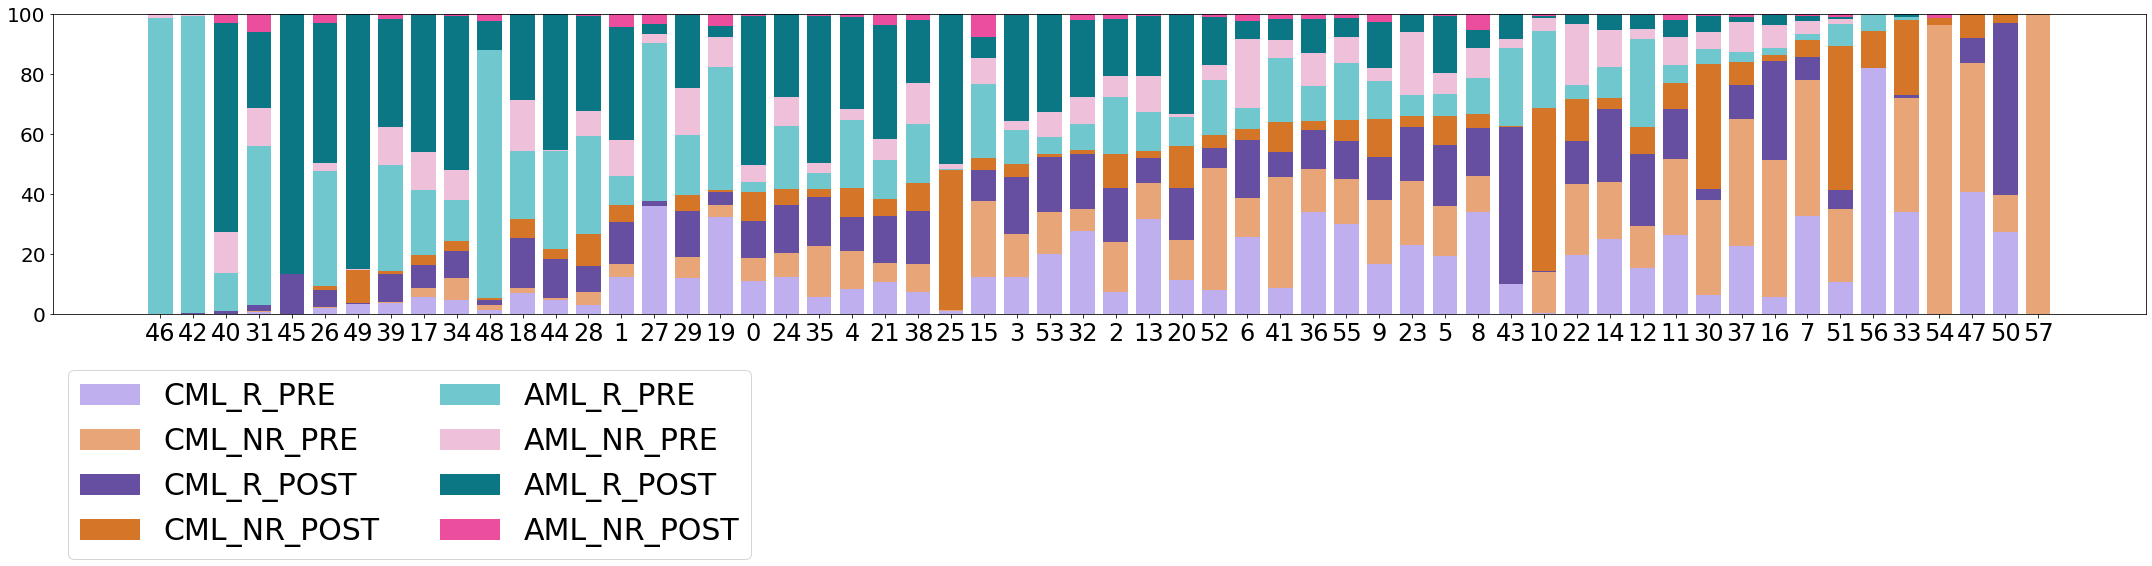

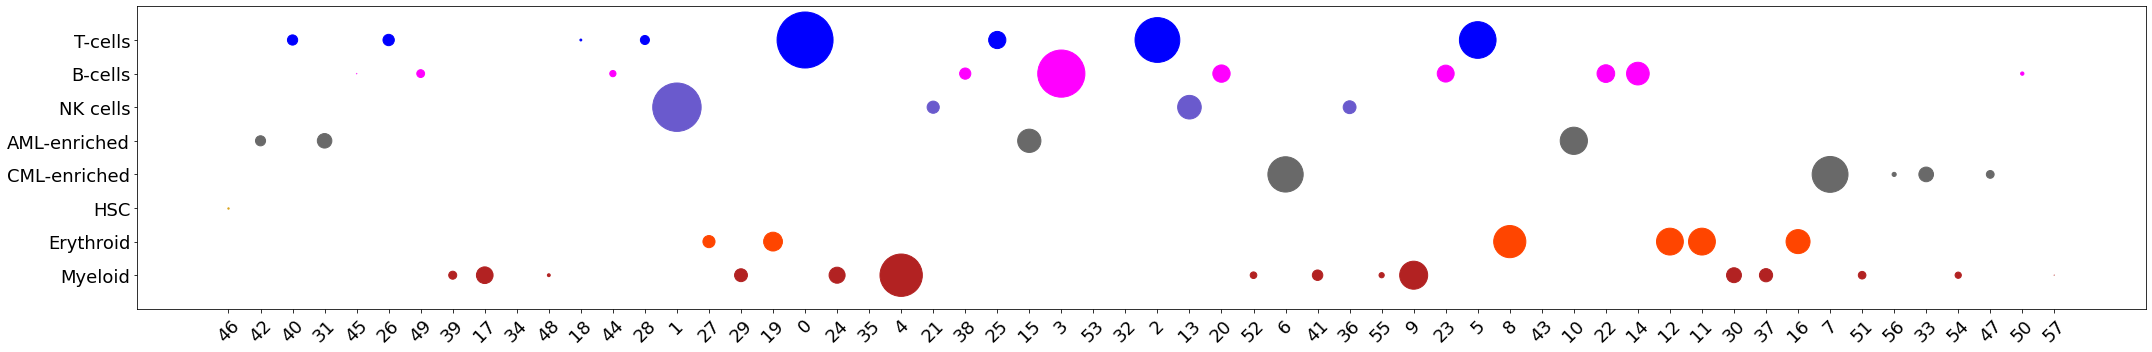

In [23]:
### 1F

TITLE = ''
FILE = ''

total_cellcount = OrderedDict()
total_cellcount['AML'] = len(umap_[umap_['dataset']=='aml1']) +len(umap_[umap_['dataset']=='aml2'])
total_cellcount['CML'] = len(umap_[umap_['dataset']=='cml3']) +len(umap_[umap_['dataset']=='cml5'])

COMP = 'response_group'

NORM = True

U = umap_[umap_['DATA'].isin(['AML','CML'])]

COMPARISON = 'response_group'
coloring = ['CML_R_PRE', 'CML_NR_PRE', 'CML_R_POST', 'CML_NR_POST', 'AML_R_PRE', 'AML_NR_PRE', 'AML_R_POST', 'AML_NR_POST']

# COMPARISON = 'DATA'
# coloring = ['AML','CML']


n_cluster_knn = np.amax(U["cluster_number"])
a = np.arange(n_cluster_knn + 1)


#make dictionary that will hold the # of cells in each cluster from that sample
sample_dict=OrderedDict()
for i in np.unique(U[COMPARISON]):
    sample_dict[i] = np.zeros(n_cluster_knn+1)
    
    
total_samples = OrderedDict()
for samp in np.unique(U[COMPARISON]): # for each data group
    
    total_samples[samp] = 0
    
    for i,cell in enumerate(U.index): #for each cell
        
        cell_id = U.loc[cell,COMPARISON]
        
        if cell_id == samp: 
            cluster = U.loc[cell,"cluster_number"]
            array = sample_dict[samp]
            array[cluster] += 1
            sample_dict[samp] = array
            total_samples[samp] += 1

## NORMALIZE BY NUMBER OF CELLS FROM EACH DISEASE GROUP

if NORM == True:
    norm_dict = OrderedDict()
    for samp in np.unique(U[COMPARISON]):
        temp = sample_dict[samp]
        if 'AML' in samp:
            norm_dict[samp] = temp/total_cellcount['AML'] * 100
        if 'CML' in samp:
            norm_dict[samp] = temp/total_cellcount['CML'] * 100
else:
    
    norm_dict = sample_dict
    
    
snum = sum(norm_dict.values())

for samp in np.unique(U[COMPARISON]):
    temp = norm_dict[samp]
    norm_dict[samp] = temp/snum * 100
    
    
df_ratios = pd.DataFrame.from_dict(norm_dict)
df = df_ratios[df_ratios.sum(axis=1)>0]

my_order = df.loc[cluster_order]


order = my_order.dropna()
order['cluster_number'] = order.index


labels = [str(i) for i in order["cluster_number"]] 

fig, ax = plt.subplots(figsize=[30, 5])
width = 0.75       # the width of the bars: can also be len(x) sequence
bottom_ = 0

for i,samp in enumerate(coloring):
    label_string = samp
    
    if label_string == 'CML_R_PRE':
        color_ = cml_r_pre_color
    elif label_string == 'CML_NR_PRE':
        color_ = cml_nr_pre_color
    elif label_string == 'CML_R_POST':
        color_ = cml_r_post_color
    elif label_string == 'CML_NR_POST':
        color_ = cml_nr_post_color
    elif label_string == 'AML_R_PRE':
        color_ = aml_r_pre_color
    elif label_string == 'AML_NR_PRE':
        color_ = aml_nr_pre_color
    elif label_string == 'AML_R_POST':
        color_ = aml_r_post_color
    elif label_string == 'AML_NR_POST':
        color_ = aml_nr_post_color
        
    if label_string == 'CML':
        color_ = 'orange'
    elif label_string == 'AML':
        color_ = 'purple'


    p = order[samp]
    if i != 0:
        bottom_ += order[coloring[i-1]]
    ax.bar(labels, p, width, bottom = bottom_, label=label_string, color =color_)


plt.xticks(fontsize = 24)
plt.yticks(fontsize =20)
fig.tight_layout()
plt.legend(bbox_to_anchor=(0, -0.5), loc='center left',ncol = 2, fontsize = 30)
plt.title(TITLE, fontsize = 30)
plt.savefig(FILE)
plt.show()



## CELL DOT PLOT 

umap_ = pd.read_csv('mainmap_umap_0811.csv', index_col = 0)
umap_ = umap_[umap_['BM']=='BM']
celltypes = pd.read_csv('annotations.csv', header = None)
cluster_order = pd.read_csv('order_revised_forbarplot.csv', index_col = 0)
cluster_order = list(cluster_order.index)

celltypes.columns =[ 'Cluster #', 'Basic Celltype']


celldict = OrderedDict()
celldict['AML-enriched'] = 'dimgrey'
celldict['CML-enriched'] = 'dimgrey'
celldict['B'] = 'fuchsia'
celldict['NK'] = 'slateblue'
celldict['T'] = 'blue'
celldict['HSC'] = 'goldenrod'
celldict['Myeloid'] = 'firebrick'
celldict['Erythroid'] = 'orangered'
celldict['REM'] = 'lightgrey'


arr = []
celltype_arr = []
count_arr = []
for cluster in cluster_order:
    counts = len(umap_.loc[umap_['cluster_number']==cluster])
    count_arr.append(counts)
    arr.append(cluster)
    cell = list(celltypes[celltypes['Cluster #']==cluster]['Basic Celltype'])
    celltype_arr.append(cell[0])
    
# df = pd.DataFrame({'cluster':arr,'counts':cluster_counts, 'start':np.repeat(1, len(all_clusters)),'end':cluster_ratio})

df = pd.DataFrame({'cluster':arr,'celltype':celltype_arr,'counts':count_arr})





x = np.arange(0,len(df))
cmlR_y_pre = np.repeat(8,len(x))
cmlNR_y_pre = np.repeat(6,len(x))
cmlR_y_post = np.repeat(4,len(x))
cmlNR_y_post = np.repeat(2,len(x))

amlR_y_pre = np.repeat(-2,len(x))
amlNR_y_pre = np.repeat(-4,len(x))
amlR_y_post = np.repeat(-6,len(x))
amlNR_y_post = np.repeat(-8,len(x))


fig, ax = plt.subplots(figsize=[30, 5])

MULT = 0.075
cmap = plt.cm.Spectral_r


tcell = df[df.celltype == 'T']
bcell = df[df.celltype == 'B']
NK = df[df.celltype == 'NK']
cml= df[df.celltype == 'CML-enriched']
aml = df[df.celltype == 'AML-enriched']
HSC = df[df.celltype == 'HSC']
erythroid = df[df.celltype == 'Erythroid']
myeloid = df[df.celltype == 'Myeloid']

y_pos = [8,6,4,2,0,-2,-4,-6]

ylabels = ['T-cells','B-cells','NK cells','AML-enriched',
           'CML-enriched','HSC','Erythroid','Myeloid',]


plot = ax.scatter(tcell.index,np.repeat(8,len(tcell.index)),  s=tcell['counts']*MULT, c = celldict['T'], label = "")
plot = ax.scatter(bcell.index,np.repeat(6,len(bcell.index)),  s=bcell['counts']*MULT,c = celldict['B'], label = "")
plot = ax.scatter(NK.index,np.repeat(4,len(NK.index)),  s=NK['counts']*MULT, c = celldict['NK'],label = "")

plot = ax.scatter(aml.index,np.repeat(2,len(aml.index)),  s=aml['counts']*MULT,c = celldict['AML-enriched'], label = "")
plot = ax.scatter(cml.index,np.repeat(0,len(cml.index)),  s=cml['counts']*MULT,c = celldict['CML-enriched'], label = "")

plot = ax.scatter(HSC.index,np.repeat(-2,len(HSC.index)),  s=HSC['counts']*MULT,c = celldict['HSC'],label = "")
plot = ax.scatter(erythroid.index,np.repeat(-4,len(erythroid.index)),  s=erythroid['counts']*MULT,c = celldict['Erythroid'],label = "")
plot = ax.scatter(myeloid.index,np.repeat(-6,len(myeloid.index)),  s=myeloid['counts']*MULT, c = celldict['Myeloid'], label = "")

ax.set_ylim(-8,10)


ax.set_yticks(y_pos)
ax.set_yticklabels(ylabels)
string = [str(cluster) for cluster in cluster_order]
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(string,  fontsize = 12)
plt.xticks(fontsize=18, rotation=45)

ax.tick_params(axis='both', which='major', labelsize=18)

fig.tight_layout()
plt.show()


